<a href="https://colab.research.google.com/github/duc-ke/kaggle-playground-group/blob/main/10.sentenseBERT/SentenceBERT_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%9E%A5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SentenceBERT 한국어 문장 클러스터링

유튜브 [빵형의 개발도상국](https://www.youtube.com/c/%EB%B9%B5%ED%98%95%EC%9D%98%EA%B0%9C%EB%B0%9C%EB%8F%84%EC%83%81%EA%B5%AD)

## GPU 사용 확인

메뉴 - 런타임 - 런타임 유형 변경 - 하드웨어 가속기 - GPU 확인

In [ ]:
!nvidia-smi

Mon Mar 21 04:55:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Sentence Transformers 패키지 설치

In [ ]:
!pip install -q -U sentence-transformers

     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 3.8 MB 10.5 MB/s 
     |████████████████████████████████| 1.2 MB 35.4 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 895 kB 32.5 MB/s 
     |████████████████████████████████| 596 kB 30.5 MB/s 
     |████████████████████████████████| 6.5 MB 7.2 MB/s 


## 문장 임베딩

한국어 문장 -> 숫자 벡터로 변환하기

https://huggingface.co/jhgan/ko-sroberta-multitask

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('jhgan/ko-sroberta-multitask')

sentences = ["안녕하세요?", "한국어 문장 임베딩을 위한 버트 모델입니다."]
embeddings = model.encode(sentences)

print(embeddings)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/585 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/931 [00:00<?, ?B/s]

[[-0.37510464 -0.7733837   0.5927709  ...  0.5792355   0.32683504
  -0.65089625]
 [-0.0936171  -0.18191506 -0.1923085  ... -0.03165798  0.30412573
  -0.26793632]]


## 클러스터링 샘플 코드

In [ ]:
from sklearn.cluster import KMeans

# Corpus with example sentences
sentences = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']

embeddings = model.encode(sentences)

# Then, we perform k-means clustering using sklearn:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  2
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  3
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  4
['한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  5
['그 여자가 아이를 돌본다.']



# 스팀 리뷰 크롤링

### [옵션1] 빵형이 미리 크롤링한거 다운로드

'엘든링 리뷰 임베딩'으로 이동

https://github.com/kairess/KoSentenceBERT-SKT/raw/main/eldenring_stream_reviews_ko.csv

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/kairess/KoSentenceBERT-SKT/raw/main/eldenring_stream_reviews_ko.csv')

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1196,878,0.966845,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,이 너머 점프 유효하다 이 앞 거짓말쟁이 있다,1646189703,1646189893,True,385,211,0.954688,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 ...,1645880172,1645880397,True,387,3,0.924138,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔,1646177519,1646177519,True,240,265,0.904640,3,True,False,False
4,111350106,"{'steamid': '76561198045823651', 'num_games_ow...",koreana,화가나도 사랑한다 씹새야,1646191684,1646191684,True,140,45,0.868988,0,True,False,False


### [옵션2] 직접 크롤링하기

- 엘든링 리뷰: https://steamcommunity.com/app/1245620/reviews/?p=1&filterLanguage=koreana&browsefilter=toprated
- Reference: https://github.com/arditoibryan/datasets/blob/main/220226_steam/get_reviews.ipynb

In [ ]:
import requests
import time

In [ ]:
def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

def get_n_reviews(appid, n=100):
    reviews = []
    cursor = '*'
    params = {
        'json' : 1,
        'filter' : 'all',
        'language' : 'koreana',
        'day_range' : 9223372036854775807,
        'review_type' : 'all',
        'purchase_type' : 'all'
    }

    while n > 0:
        time.sleep(2)
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [ ]:
reviews = get_n_reviews(1245620, 10000)

reviews[:5]

[{'author': {'last_played': 1647652169,
   'num_games_owned': 94,
   'num_reviews': 8,
   'playtime_at_review': 8099,
   'playtime_forever': 9434,
   'playtime_last_two_weeks': 3237,
   'steamid': '76561198065764106'},
  'comment_count': 0,
  'language': 'koreana',
  'received_for_free': False,
  'recommendationid': '111342915',
  'review': '피했다고 씨발아',
  'steam_purchase': True,
  'timestamp_created': 1646182946,
  'timestamp_updated': 1646907680,
  'voted_up': True,
  'votes_funny': 878,
  'votes_up': 1196,
  'weighted_vote_score': '0.966844797134399414',
  'written_during_early_access': False},
 {'author': {'last_played': 1647612501,
   'num_games_owned': 168,
   'num_reviews': 57,
   'playtime_at_review': 612,
   'playtime_forever': 2044,
   'playtime_last_two_weeks': 1211,
   'steamid': '76561198139607001'},
  'comment_count': 0,
  'language': 'koreana',
  'received_for_free': False,
  'recommendationid': '111348309',
  'review': '이 너머, 점프 유효하다\n\n이 앞, 거짓말쟁이 있다',
  'steam_purchase':

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(reviews)

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1196,878,0.966844797134399414,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,"이 너머, 점프 유효하다\n\n이 앞, 거짓말쟁이 있다",1646189703,1646189893,True,385,211,0.954687893390655518,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜\n\n단점은 개적화;;;\n\nNVIDIA 제어판에서 쉐이더 캐쉬 =>...,1645880172,1645880397,True,387,3,0.924138486385345459,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1646177519,1646177519,True,240,265,0.904639720916748047,3,True,False,False
4,111350106,"{'steamid': '76561198045823651', 'num_games_ow...",koreana,화가나도 사랑한다 씹새야,1646191684,1646191684,True,140,45,0.868988394737243652,0,True,False,False


## 전처리

- 한글이 아닌 글자 제거
- 작은따옴표 제거
- 연속된 공백 제거
- 좌우 공백 제거
- 최대 글자 255자

In [ ]:
df['review'] = df['review'] \
  .replace(r'[^가-힣 ]', ' ', regex=True) \
  .replace("'", '') \
  .replace(r'\s+', ' ', regex=True) \
  .str.strip() \
  .str[:255]

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1196,878,0.966844797134399414,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,이 너머 점프 유효하다 이 앞 거짓말쟁이 있다,1646189703,1646189893,True,385,211,0.954687893390655518,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 ...,1645880172,1645880397,True,387,3,0.924138486385345459,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔,1646177519,1646177519,True,240,265,0.904639720916748047,3,True,False,False
4,111350106,"{'steamid': '76561198045823651', 'num_games_ow...",koreana,화가나도 사랑한다 씹새야,1646191684,1646191684,True,140,45,0.868988394737243652,0,True,False,False


## 전처리2

아무것도 안써있는 리뷰 제거

In [ ]:
df = df[df['review'].str.strip().astype(bool)]

len(df)

8242

마지막으로 확인

In [ ]:
df['review'].values.tolist()[:5]

['피했다고 씨발아',
 '이 너머 점프 유효하다 이 앞 거짓말쟁이 있다',
 '장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 엘든링 추가 전원 관리 모드를 최고 성능 선호 카메라 조작중 스터터링 증상 모두 사라짐',
 '트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔',
 '화가나도 사랑한다 씹새야']

## CSV 파일로 저장

In [ ]:
df.to_csv('eldenring_stream_reviews_ko.csv', index=False)

## 엘든링 리뷰 임베딩

In [ ]:
corpus = df['review'].values.tolist()

embeddings = model.encode(corpus)

embeddings[:5]

array([[-0.22529417, -0.41753626,  0.6130392 , ..., -0.10349625,
        -0.7012687 , -0.5617138 ],
       [-0.9064568 ,  0.02967472,  1.02179   , ...,  0.2281066 ,
        -0.0695185 ,  0.10106523],
       [-0.19821419,  0.33884296,  0.4552719 , ...,  0.09432784,
         0.0760655 ,  0.00539286],
       [-0.3279998 ,  0.11018913,  0.8197105 , ..., -0.08382764,
        -0.6934301 , -0.56813014],
       [-0.1807707 ,  0.00652862,  0.01430997, ...,  0.27408367,
        -0.25302672, -0.7583498 ]], dtype=float32)

## k=3 클러스터링

In [ ]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

Cluster 1 (2566)
['피했다고 씨발아', '이 너머 점프 유효하다 이 앞 거짓말쟁이 있다', '화가나도 사랑한다 씹새야', '엘든 링인 것 같지', '목표는 구멍 그리고 씨앗 바쳐라', '오늘도 나는 그들에게 메세지를 남긴다 이 너머 숨겨진 길 있다', '그럴 자격 없다 오오 그럴 자격없다', '엘든링 최적화좀', '이 너머 기쁨 있다 즉 엘든 링 오오 엘든 링', '씨발 렉 멈춰', '오픈크리틱 점', '언제 나오나요', '말레니아 씨발년아', '그럴 자격 없다 오오 그럴 자격 없다', '컴퓨터에서 김포공항 소리남', '무기 양손잡기 는 왼쪽 마우스 클릭 입니다', '보스 시발련아 좀 떄려봐 언제까지 들고만 있는데', '어리석은 야심은 잊고 환불하러 갑니다', '사양 충분히 맞췄는데 프레임 시발년들아', '개같이 멸망', '갓겜', '손가락 하지만 구멍 오오 그럴자격 없다', '나는 엘데의 진정한 왕이다', '점프 눌렀다고 개새끼야', '오니교부 트리가드로 개명하고 나왔더니 개쎄네', '안티치트 씨발년들아', '한대만', '시발 날 엘든링 속으로 보내줘', '오오 그럴자격없다 오오 그럴자격없다', '죽어도 다시한번', '전나맵네', '이 앞 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 엘든링 있다 따라서 갓겜 있음', '보크를 엘데의 왕으로', '이게 년 게임', '내가 오늘 이 씹새낀 잡고 끈다 아', '슬슬 갓겜같으면 개추', '이 앞 좆같음 있다', '시발', '오오오 스터터 링 스터터 링 엘든 링', '뭐지 이 오류덩어리는', '프레임 드랍도 일종의 패턴인가요', '프레임이 뚝뚝 끊겨서 진행을 못하겠어요', '이것이야 말로 갓겜이다', '최적화나 되었으면', '나만 당할수 없지', '이 너머 구멍있다 그러니까 손가락 있으라', '림그레이브 이곳이 현생이다',

# 워드클라우드 그리기

## 형태소 분석, 명사 추출

In [ ]:
!pip install -q konlpy tqdm

In [ ]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = []

for review in tqdm(df['review'].values.tolist()):
    nouns.extend(extractor.nouns(review))

len(nouns)

100%|██████████| 8242/8242 [00:52<00:00, 155.98it/s]


73548

In [ ]:
from collections import Counter

count = Counter(nouns)
words = dict(count.most_common())

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break

    print(word, count)

게임 2268
엘든링 2225
것 1038
수 807
소울 806
최적화 746
다크소울 659
나 569
갓겜 546
오픈월드 546
시간 521


## 한글 폰트 다운로드

In [ ]:
!wget https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf

--2022-03-19 04:44:35--  https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf [following]
--2022-03-19 04:44:35--  https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063276 (1.0M) [application/octet-stream]
Saving to: ‘NanumSquareRoundR.ttf’

NanumSquareRoundR.t 100%[===================>]   1.01M  --.-KB/s    in 0.05s   

2022-03-19 04:44:35 (20.8 MB/s) - ‘NanumSquareRoundR.ttf’ saved [1063276

## 워드클라우드 그리기

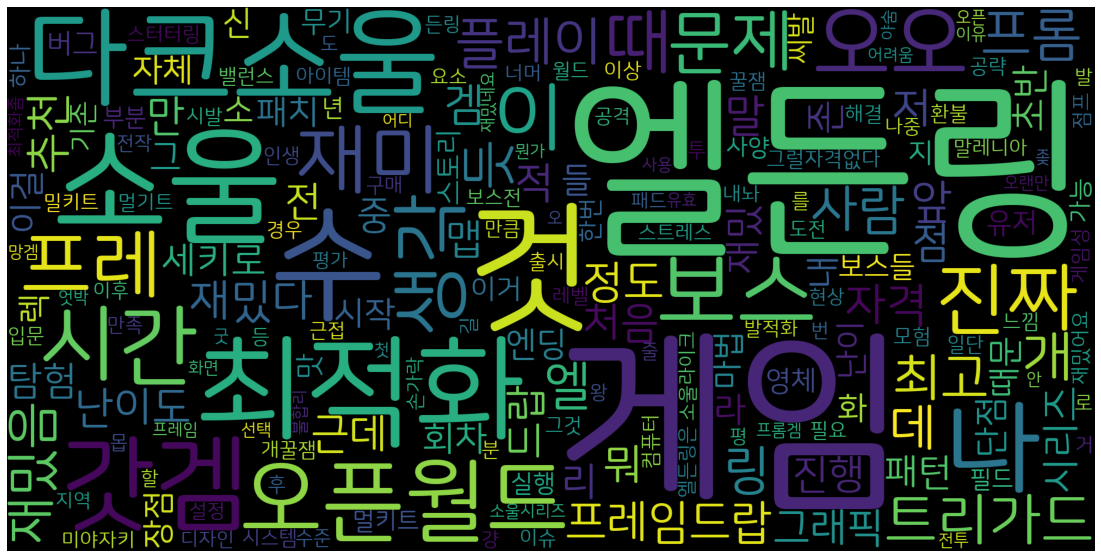

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 기타

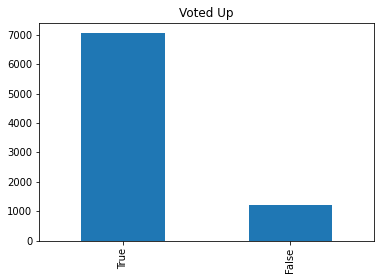

In [ ]:
df['voted_up'].value_counts().plot(kind='bar', title='Voted Up')

In [ ]:
import json

total_playtime = 0

for i in range(len(df)):
    playtime = json.loads(df.iloc[i]['author'].replace("\'", "\""))['playtime_forever']

    total_playtime += playtime

print('전체 플레이타임 합계 (분)', total_playtime)
print('전체 플레이타임 합계 (시간)', total_playtime / 60)
print('평균 플레이타임 (시간)', total_playtime / len(df) / 60)

전체 플레이타임 합계 (분) 43254990
전체 플레이타임 합계 (시간) 720916.5
평균 플레이타임 (시간) 87.46863625333657


In [ ]:
print('빛바랜 자 화이팅!')

빛바랜 자 화이팅!
